# Project description
You work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. You need to identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns.  

In front of you is data going back to 2016. Let’s imagine that it’s December 2016 and you’re planning a campaign for 2017.

**Abbreviation:** 
> *ESRB*: The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature.
> - eC - From 3 years
> - E - From 6 years Until 1998: K-A
> - E10+ - From 10
> - T - From 13
> - M - From 17
> - AO - From 18+
> - RP - Rating pending

The dataframe contains the following collumns: 
> - Name
> - Platform
> - Year_of_Release (Note: Data for 2016 may be incomplete)
> - Genre
> - NA_sales (North American sales in USD million)
> - EU_sales (sales in Europe in USD million)
> - JP_sales (sales in Japan in USD million)
> - Other_sales (sales in other countries in USD million)
> - Critic_Score (maximum of 100)
> - User_Score (maximum of 10)
> - Rating (ESRB)


# Table of Contents
- [Project description](#Project-description)
- [Table of Contents](#Table-of-Contents)
- [1. Data immport and inspection](#1.-Data-immport-and-inspection)
- [2. Preprocessing](#2.-Preprocessing)
    * [2.1. Replacing collumn names](#2.1.-Replacing-collumn-names)
    * [2.2. Calculating additional features](#2.2.-Calculating-additional-features)
    * [2.3. Cathegorizing Data](#2.3.-Cathegorizing-Data)
    * [2.4. Filling missing values](#2.4.-Filling-missing-values)
        + [2.4.2. Filling year of release](#2.4.2.-Filling-year-of-release)
            - [2.4.2.1. Filling based on title](#2.4.2.1.-Filling-based-on-title)
            - [2.4.2.2. Filling based on other platforms](#2.4.2.2.-Filling-based-on-other-platforms)
            - [2.4.2.3. Dropping rest of unknown years](#2.4.2.3.-Dropping-rest-of-unknown-years)
        + [2.4.3. Filling missing values scores](#2.4.3.-Filling-missing-values-scores)
            - [2.4.3.1. Filling based cross platform](#2.4.3.1.-Filling-based-cross-platform)
            - [2.4.3.2. Filling based on overcross score](#2.4.3.2.-Filling-based-on-overcross-score)
            - [2.4.3.3. Fill tbd values](#2.4.3.3.-Fill-tbd-values)
                * [2.4.3.3.1. Training Linear regressions](#2.4.3.3.1.-Training-Linear-regressions)
                * [2.4.3.3.2. Applying Linear regressions](#2.4.3.3.2.-Applying-Linear-regressions)
            - [2.3.3.4. Filling dataframe with impossible scores](#2.3.3.4.-Filling-dataframe-with-impossible-scores)
        + [2.3.4. Filling missing ratings](#2.3.4.-Filling-missing-ratings)
    * [2.4. Changing datatypes](#2.4.-Changing-datatypes)
        + [2.4.1.  year_of_release](#2.4.1.--year_of_release)
        + [2.4.2. Scores](#2.4.2.-Scores)
    * [2.5. Conclution](#2.5.-Conclution)
- [3. Data analysis](#3.-Data-analysis)
    * [3.1. Games over time](#3.1.-Games-over-time)
    * [3.2. Games over platform](#3.2.-Games-over-platform)
        + [3.2.1. Overview all platforms](#3.2.1.-Overview-all-platforms)
        + [3.2.2. Historical Overview about greatest sale platform playstation](#3.2.2.-Historical-Overview-about-greatest-sale-platform-playstation)
        + [3.2.3. Historical overview about rest of platforms (nintendo, gameboy and xbox)](#3.2.3.-Historical-overview-about-rest-of-platforms-(nintendo,-gameboy-and-xbox))
        + [3.2.4. Historical overview about console types:](#3.2.4.-Historical-overview-about-console-types:)
        + [3.2.5. Average lifetime of consoles](#3.2.5.-Average-lifetime-of-consoles)
    * [3.3. Influence reviews on sales for PS2](#3.3.-Influence-reviews-on-sales-for-PS2)
        + [3.3.1. General recap to chapter 2.3.3.](#3.3.1.-General-recap-to-chapter-2.3.3.)
        + [3.3.2. Reviews and Sales on PS2](#3.3.2.-Reviews-and-Sales-on-PS2)
    * [3.4. Identify profitable genre](#3.4.-Identify-profitable-genre)
    * [3.5. Sales after Region](#3.5.-Sales-after-Region)
        + [3.5.1. Top 5 platforms after region](#3.5.1.-Top-5-platforms-after-region)
        + [3.5.2 Top 5 genres](#3.5.2-Top-5-genres)
        + [3.5.3. Effect of ESRB Ratings in regions](#3.5.3.-Effect-of-ESRB-Ratings-in-regions)
- [4. Statistical data analysis](#4.-Statistical-data-analysis)
    * [4.1. XOne and PC scores](#4.1.-XOne-and-PC-scores)
    * [4.2. Action vs. Sports Ratings](#4.2.-Action-vs.-Sports-Ratings)
- [5. Conclution](#5.-Conclution)

# 1. Data immport and inspection
> In this step the data has been imported and the basic analysis has been carried out to indentify the issues and points to work on.

In [1]:
import re
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from sklearn import linear_model
%matplotlib inline

try:
    games = pd.read_csv('games.csv')
    
except:
    games = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [2]:
# Displaying the characteristical data of the dataframe
display(games.head())
display(games.describe())
display(games.info())
games.isna().sum()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [3]:
# Investigating origin of object type in user score column
print('User_score elements:\n', games['User_Score'].value_counts())

# Investigating the ratings:
print('Ratings:', games['Rating'].unique())
games['Rating'].value_counts()

User_score elements:
 tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.5       2
1.9       2
0.5       2
9.7       1
0         1
Name: User_Score, Length: 96, dtype: int64
Ratings: ['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

> **Observation:**  
> - The dataframe contains outliers which might need to be removed (eg. mean of year_of_release 2006.4 and min value 1980)  
> - The collumns have different ammount of missing entries which need to be filled or dropped in case that not sensufll fillable  
> - The collumn names need to be unified (mixed case -> lower_case)  
> - The datatypes of some collumns need to be changed:  
>     - year_of_release: float -> datetime  
>     - critic_score: float -> int  
>     - User_scoreobject -> int/float (notice here, that they are strings containing tbd - to be determined)
> - Cathegroical collumns need to be cathegorized:
>     - genre
>     - platform  
>     - rating (here further investigating need to be done to know what the abbrehentions are meaning)
> - **In more than 50% of the dataset there are features missing** -> Talking with the data engineer  
> In Rating collumn, EC, RP and AO only few entries, consider as not representative

# 2. Preprocessing

## 2.1. Replacing collumn names
> In this step the header have been converted from mixed-case to lower case

In [4]:
# defining the new column names
games.columns = games.columns.str.lower()
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## 2.2. Calculating additional features
> In this step the total sales per game (per platform) have been calculated and addet to the dataframe in a separate column. 

In [5]:
games['total_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].apply(lambda x: sum(x), axis=1)
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


## 2.3. Cathegorizing Data
> In the third step the collumns platform, genre as well as rating have been cathegorized.  
> This cathegorization has veen carried out before filling data to ease the preprocessing by enabling scatterplotts as well as correlations between columns


> Therefore firstly the two collumns where the genre is NaN are investigated. As it can be seen below, the two rows are hardly usefull for further investigations because there lacking information regarding genre, sccores and rating. Therefore they have been dropped.
> Furthermore the K-A and E ratings are merged to E (because E replaced K-A 1998)

In [6]:
# Investigating NaN genres
display(games[games['name'].isna()==True])

# Aggregating rows to drop and performing drop
to_drop_cat = games.index[games['name'].isna() == True].tolist()
games.drop(to_drop_cat, inplace=True)
games.reset_index(inplace=True, drop=True)

# Replacing K-A ratings with E
games.loc[games['rating'] == 'K-A', 'rating'] = 'E' 

# Aggregating dicts for cathegorizing
platforms = {platform: i for i, platform in enumerate(games['platform'].unique())}
genres = {genre: i for i, genre in enumerate(games['genre'].unique())}
ratings = {rating: i for i, rating in enumerate(games['rating'].unique())}

# Cathegoizing
for col, cat in zip(['platform', 'genre', 'rating'], [platforms, genres, ratings]):
    games[col + '_cat'] = games[col].apply(lambda x: cat[x])

games.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,2.39
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,platform_cat,genre_cat,rating_cat
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54,0,0,0
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24,1,1,1


## 2.4. Filling missing values
> Before changing the datatypes in some cases filling the missing data is crucial  

### 2.4.2. Filling year of release
> In this chapter the year_of_release has been filled. Therefore the 269 Cases have been first investigated:
> They could be researched one by one but this is quite time consuming, therefore the data has been filled in the following manner:

In [7]:
# Printing columns with missing data
games.loc[games['year_of_release'].isna() == True].head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,platform_cat,genre_cat,rating_cat
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,5.24,6,0,0
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,3.50,6,0,0


> **Observation**:  
> - Muiltiple games have their year in their name. Thus, in the following step, the year has been extracted from the names if possible  
> - Games are publisht on different plattforms

#### 2.4.2.1. Filling based on title
> In this step the year has been filled based on the title. If the title contains a date (yy oder yyyy), then the date is extracted an filled

In [8]:
def extract_age(name, raise_warning=False):
    '''This function extracts all numbers from the name. In case that the number maches one of the conditions,
    the extracted year is returned
    [arguments]:
        name[str]: name of the video game
    [retun]:
        np.nan / year[int]
    '''
    year = re.findall(r'\b\d+\b', name)

    if not year:
        return np.nan
    
    if len(year) > 1:
        if raise_warning: warnings.warn(f'More than one number in \'{name}\' detected: {year}')
        return np.nan
    
    if int(year[0]) not in range(1980, 2016):
        if raise_warning: warnings.warn(f'Age in \'{name}\' out of boundaries: {year}')
        return np.nan
    
    if year[0].startswith('0'):
        year[0] = '20' + year[0]

    return int(year[0])

In [9]:
# Defining boolean cond. for missing year
cond_missing_years = games['year_of_release'].isna() == True

# Apply the function on the dataslice with missing year_of_release
games.loc[cond_missing_years, 'year_of_release'] = games.loc[cond_missing_years, 'name'].apply(extract_age)
print(games['year_of_release'].isna().sum())

252


#### 2.4.2.2. Filling based on other platforms
> In this missing years are filled by checking other platform for simmilar games. In case multiple years are given the lastat_res date has been chosen  
> That the release years of platforms might differ might be a problem. But due to the fact, that those release dates are normally not differing more than a few months, the risk of significant errors is mininmal and acceptable (also to the fact that less then 250 entries are effected.)

In [10]:
# Aggregating all games after years, to fill missing years on entries of the same game on an other platform.
games_years = {}
for game, years in games.groupby('name')['year_of_release']:
    games_years[game] = years.max() 

# Applying dict on missing year_of_release df
games.loc[cond_missing_years, 'year_of_release'] = games.loc[cond_missing_years, 'name'].apply(lambda x: float(games_years[x]))
print(games['year_of_release'].isna().sum())

139


#### 2.4.2.3. Dropping rest of unknown years
> Due to the fact, that the development of platform and genre over time will be checked later and there is no sensfull way to fill in the missing years, the row will be dropped (around 0.8% of data)

In [11]:
# Aggregating rows to drop and performing drop
to_drop_year = games.index[games['year_of_release'].isna() == True].tolist()
games.drop(to_drop_year, inplace=True)
games.reset_index(inplace=True, drop=True)
print(games['year_of_release'].isna().sum())

0


### 2.4.3. Filling missing values scores
> Within this chapter the missing values for the scores (user and critic) have been filled. Therefore the following steps have been carried out:

> 1. Filling based cross platform
> 2. Filling based on overcross score 
> 3. Filling tbd values
> 5. Filling original dataframe with impossible scores 

#### 2.4.3.1. Filling based cross platform
> In this step, the missing scores have been filled based on the ratings of the game on other platforms.  
> Therefore the mean of ratings of the game from other platforms has been calculated and filled for both scores, if available.

In [12]:
# Aggregating all games after critic_score, to fill missing scores with crossplatform scores
games_critic_score = {}
for game, score in games.groupby('name')['critic_score']:
    games_critic_score[game] = score.dropna().mean()

games_user_score = {}
for game, score in games.groupby('name')['user_score']:
    games_user_score[game] = score[score != 'tbd'].astype(float).dropna().mean()


mask_missing_critic = games['critic_score'].isna() == True
mask_missing_user = games['user_score'].isna() == True

# Applying dict on related cols
print(games[['critic_score', 'user_score']].isna().sum())
games.loc[mask_missing_critic, 'critic_score'] = games.loc[mask_missing_critic, 'name'] \
                                                      .apply(lambda x: float(games_critic_score[x])
                                                  )
games.loc[mask_missing_user, 'user_score'] = games.loc[mask_missing_user, 'name'] \
                                                  .apply(lambda x: float(games_user_score[x])
                                             )
print(games[['critic_score', 'user_score']].isna().sum())

critic_score    8495
user_score      6636
dtype: int64
critic_score    7535
user_score      6285
dtype: int64


#### 2.4.3.2. Filling based on overcross score 
> In this step the scores have been filled based on the other score (user -> critic and vice versa) if they were existing.  
> As it can be seen in the cell below in total (both directions there are 303 (253 user scores and 53 critic scores))  
> In the first step the mean values of the valid scores is investigated to check if filling one by the other is possible

In [13]:
# Preparing the valid data for the SDA to check if scores can be filled in 
stat_res = games[(games['user_score'] != 'tbd')].copy()
stat_res['user_score'] = stat_res['user_score'].astype(float)
stat_res = stat_res[((stat_res['user_score'].isna()==False) & (stat_res['critic_score'].isna()==False))]
stat_res['user_score'] = stat_res['user_score']*10
stat_res[['user_score', 'critic_score']].describe()

,user_score,critic_score
count,7641.000000,7641.000000
mean,71.494828,70.301242
std,14.694299,13.902722
min,2.000000,13.000000
25%,64.000000,62.000000
50%,75.000000,72.000000
75%,82.000000,81.000000
max,96.000000,98.000000


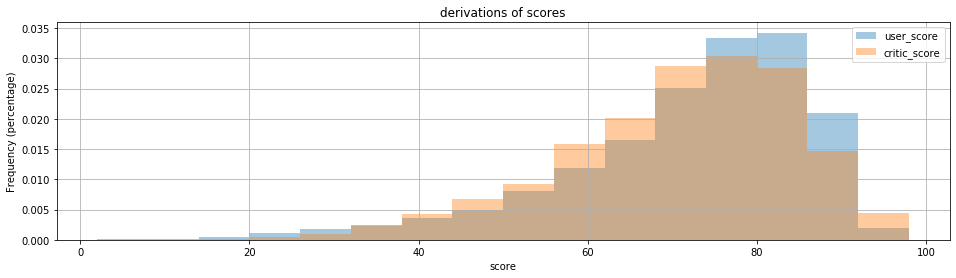

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))

axes = stat_res[['user_score', 'critic_score']].plot(kind='hist',
                                          density=True,    
                                          grid=True, 
                                          figsize=(16,4), 
                                          bins=16, 
                                          title='derivations of scores', 
                                          legend=True,
                                          alpha=0.4,
                                          ax=axes  
                                        );
axes.set_xlabel('score');
axes.set_ylabel('Frequency (percentage)');
axes.set_title('derivations of scores');


In [15]:
st.levene(stat_res['user_score'], stat_res['critic_score'])

LeveneResult(statistic=0.401987019916084, pvalue=0.5260743482017463)

> **Observation**:  
> alpha = 5% = 0.05  
> H0: means of population are equal  
> H1: means of population are not equal  
> \-\> pvalue > alpha/2 \-\> Failed to reject H0, use equal var for testing

In [16]:
st.ttest_ind(stat_res['user_score'], stat_res['critic_score'],equal_var=True)

Ttest_indResult(statistic=5.157707417598957, pvalue=2.5311662589910013e-07)

> **Observation**:  
> alpha = 5% = 0.05  
> H0: means of population are equal  
> H1: means of population are not equal  
> \-\> pvalue < alpha/2 \-\> H0 rejected, not possible to fill in the scores based on the other one

#### 2.4.3.3. Fill tbd values
> In this step the tbd (around 14% rows of the dataset) values have been filled in in the original dataframe.
> Even with the the high percentage of missing values, they are filled in due to their significance.  
> This significance is assumed due to the fact that they are labled and not just missing values. Therefore it might be important  to have them in later investigations. 
> To be able to identify filled tbd rows later, an additional collumn ('determined') will be added.

> The filling itself is based on the mean values of related collumns. Those related collumns have been investigated based on scatterplots and correlation (matrixes)

**Plots below disabled**

In [17]:
# Creating scatterplott from valid data to get t
scat_colls = ['critic_score',
 'genre',
 'year_of_release',
 'total_sales',
 'genre_cat',
 'platform_cat',
 'user_score',
 'rating_cat'
]
#pd.plotting.scatter_matrix(stat_res[scat_colls], figsize=(14,14), grid=True);
stat_res[scat_colls].corr()

,critic_score,year_of_release,total_sales,genre_cat,platform_cat,user_score,rating_cat
critic_score,1.000000,0.004460,0.231083,-0.098563,0.130512,0.548455,-0.053979
year_of_release,0.004460,1.000000,-0.017021,0.095797,-0.034637,-0.252060,0.143654
total_sales,0.231083,-0.017021,1.000000,-0.052438,-0.126075,0.087427,-0.069606
genre_cat,-0.098563,0.095797,-0.052438,1.000000,0.021493,-0.001165,0.374872
platform_cat,0.130512,-0.034637,-0.126075,0.021493,1.000000,0.091261,-0.019844
user_score,0.548455,-0.252060,0.087427,-0.001165,0.091261,1.000000,0.001422
rating_cat,-0.053979,0.143654,-0.069606,0.374872,-0.019844,0.001422,1.000000


> **Observation**  
> total sales and year_of_release have some impacts on the critic score as well as the user score middle linear correlation

> Before the filling a collum will be added which indicates that the tbd values have been filled 
> Therefore the filling will be done in two different steps:  
> 1. tbd values with critics_score 
>     1. A linear regression model based on the valid critic_score and total sales is built
> 2. tbd values without critic_score 
>     1. A linear regression model based on total_sales and year_of_release is built

##### 2.4.3.3.1. Training Linear regressions
> In this chapter the linear regression models for filling the tbd values in the previous defined staps have been trained

In [18]:
# Copying dataframe for filling values
df_linreg = games[['total_sales', 'user_score', 'critic_score', 'year_of_release']].copy()

In [19]:
# Checking for outliers

#Total sales
#df_linreg.boxplot(column='total_sales');
#plt.ylim(-.5, 4)

#calculating iqr, lower and upper whisker
iqr = df_linreg['total_sales'].quantile(.75) - df_linreg['total_sales'].quantile(.25)
low = df_linreg['total_sales'].quantile(.25) - iqr*1.5
up = df_linreg['total_sales'].quantile(.75) + iqr*1.5
print(low, up)

#Total sales
#df_linreg.boxplot(column='total_sales');
#plt.ylim(-.5, 4)

#calculating iqr, lower and upper whisker
iqr = df_linreg['year_of_release'].quantile(.75) - df_linreg['year_of_release'].quantile(.25)
low = df_linreg['year_of_release'].quantile(.25) - iqr*1.5
up = df_linreg['year_of_release'].quantile(.75) + iqr*1.5
print(low, up)

-0.5549999999999999 1.085
1992.5 2020.5


In [20]:
# 1.Dropping not usable row (containing an NaN value or 'tbd as user_score')
# 1.1. Masking values to drop containing 'tbd' as user_score
to_drop = df_linreg.index[df_linreg['user_score'] == 'tbd'].tolist()
df_linreg.drop(to_drop, inplace=True)
df_linreg.dropna(inplace=True)
df_linreg.reset_index(inplace=True, drop=True)

# Converting valid entries into float
for col in ['critic_score', 'user_score']:
    df_linreg[col] = df_linreg[col].astype(float)
    df_linreg[col] = df_linreg[col].astype(float)

df_linreg_cleaned = df_linreg.query('(total_sales < 1.5) and (year_of_release > 1994)')

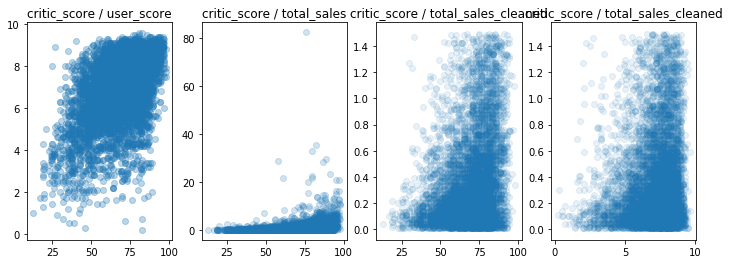

In [21]:
# Checking correlations in detail, checking for outliers
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))
axes[0].scatter(df_linreg['critic_score'], df_linreg['user_score'], alpha=0.3);
axes[0].set_title('critic_score / user_score')

axes[1].scatter(df_linreg['critic_score'], df_linreg['total_sales'], alpha=0.2);
axes[1].set_title('critic_score / total_sales')

axes[2].scatter(df_linreg_cleaned['critic_score'], df_linreg_cleaned['total_sales'], alpha=0.1);
axes[2].set_title('critic_score / total_sales_cleaned')

axes[3].scatter(df_linreg_cleaned['user_score'], df_linreg_cleaned['total_sales'], alpha=0.1);
axes[3].set_title('critic_score / total_sales_cleaned')

plt.show()

In [22]:
# Defining features and dependent variable
# User score
X_score = df_linreg_cleaned[['critic_score', 'total_sales']].values
y_score = df_linreg_cleaned['user_score'].values
linreg_score = linear_model.LinearRegression()
linreg_score.fit(X_score, y_score);

# Year of release
X_year = df_linreg_cleaned[['year_of_release', 'total_sales']].values
y_year = df_linreg_cleaned[['user_score', 'critic_score']].values
linreg_year = linear_model.LinearRegression()
linreg_year.fit(X_year, y_year);

# Plotting result score
#y_pred = linreg_score.predict(X_score)
#fig1, axes1 = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
#axes1[0].scatter(df_linreg_cleaned['critic_score'], df_linreg_cleaned['user_score'], alpha=0.5);
#axes1[0].plot(df_linreg_cleaned['critic_score'], y_pred, color='red');
#axes1[1].scatter(df_linreg_cleaned['total_sales'], df_linreg_cleaned['user_score'], alpha=0.5);
#axes1[1].plot(df_linreg_cleaned['total_sales'], y_pred, color='red');

# Plotting year of release
# y_pred = linreg_year.predict(X_year)
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
# axes[0].scatter(df_linreg_cleaned['year_of_release'], df_linreg_cleaned['user_score'], alpha=0.5);
# axes[0].plot(df_linreg_cleaned['year_of_release'], y_pred, color='red');
# axes[1].scatter(df_linreg_cleaned['total_sales'], df_linreg_cleaned['user_score'], alpha=0.5);
# axes[1].plot(df_linreg_cleaned['total_sales'], y_pred, color='red');

##### 2.4.3.3.2. Applying Linear regressions
> In this chapter the trained linear regressions have been used to fill in the tbd values

In [23]:
# Applying the models to the tbd frame

# Defining function to fill linreg
def fill_tbd(critic_score, total_sales, yor):
    '''This function returns the estimated user_score for the assigned variables'''
    
    if not np.isnan(critic_score):
        user_score = linreg_score.predict(np.array([[critic_score, total_sales]]))[0]
        return critic_score, user_score

    user_score, critic_score = linreg_year.predict(np.array([[yor, total_sales]]))[0]
    return critic_score, user_score
    
    
# Defining arguments 
mask_tbd = games['user_score']=='tbd'
cols_reg = ['critic_score', 'total_sales', 'year_of_release']

# Marking the filled columns and fill columns
games['tbd'] = (games['user_score'] == 'tbd').astype(int)
games.loc[mask_tbd, 'critic_score'], games.loc[mask_tbd, 'user_score'] = (games.loc[mask_tbd, cols_reg]
                                                                               .apply(lambda x: fill_tbd(*x), axis=1)
                                                                               .str
                                                                         )

#### 2.3.3.4. Filling dataframe with impossible scores 
> Due to the fact that there are around 40% od missing scores, they will not be filled with means in the original dataframe to prevent distortation.  
> Therefore in this step the missing scores will be filled in with values which are off the scale. (eg. 11, 110) This allows to identify and filter them in later analysis if needed

In [24]:
# Filling NaN values 
games['user_score'].fillna(11, inplace=True)
games['critic_score'].fillna(110, inplace=True)

### 2.3.4. Filling missing ratings
>In this step the missing ratings have been filled in two steps:
> 1. Filling with overcross platform data  
> 2. Filling with string 'unknown'

In [25]:
#Filling with overcross data

# Aggregating ratings for game
games_rating = {}
i=0
for game, rating in games.groupby('name')['rating']:
    rating.dropna(inplace=True)
    if rating.empty:
        games_rating[game] = np.NaN
    else:
        games_rating[game] = rating.iloc[0]

mask_missing_rating = games['rating'].isna() == True

# Applying dict on related cols
print('Before filling:', games['rating'].isna().sum())
games.loc[mask_missing_rating, 'rating'] = (games.loc[mask_missing_rating, 'name']
                                                 .apply(lambda x: games_rating[x])
                                                  )
print('After filling:', games['rating'].isna().sum())

# Filling with string
games['rating'].fillna('unknown', inplace=True)

# Update categorization
ratings.pop(np.nan)
ratings.update({'unknown': 1})

Before filling: 6703
After filling: 6266


## 2.4. Changing datatypes
> In this step the datatypes of the cllumns have been adjusted as described in Step 1. Those datatype changes had been carried out to ease the further investigation (eg. enabling working with datetime methods/attributes)  

> This changes substituted of:  
> - years_of_release
> - critic_score
> - user_score

### 2.4.1.  year_of_release
> In this step the year of release has been converted from float to datetime

In [26]:
# Investigating 
games['year_of_release'] = pd.to_datetime(games['year_of_release'].astype(int).astype(str),
                                          format='%Y'
                                          ).dt.year
games.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,platform_cat,genre_cat,rating_cat,tbd
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54,0,0,0,0
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,110.0,11,unknown,40.24,1,1,1,0


### 2.4.2. Scores
> In this step critics and user score has converted from object (str) to float

In [27]:
for col in ['user_score', 'critic_score']:
    games[col] = games[col].astype(float)

## 2.5. Conclution
> In this step the preprocessing has been carried out. This included:
> - Adding addtional features
> - Cathegorizing
> - Filling of missing data with multiple strategies 
> - Changing datatypes 

> The data has been filled in a way to prevent distortion but filling as much data as possible.
> Regarding the need of replacing the tbd values, it need to talked with the responsible persons if those datapoints are really as important as assumed or if they can be treated as NaN values.

In [28]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16574 entries, 0 to 16573
Data columns (total 16 columns):
name               16574 non-null object
platform           16574 non-null object
year_of_release    16574 non-null int64
genre              16574 non-null object
na_sales           16574 non-null float64
eu_sales           16574 non-null float64
jp_sales           16574 non-null float64
other_sales        16574 non-null float64
critic_score       16574 non-null float64
user_score         16574 non-null float64
rating             16574 non-null object
total_sales        16574 non-null float64
platform_cat       16574 non-null int64
genre_cat          16574 non-null int64
rating_cat         16574 non-null int64
tbd                16574 non-null int32
dtypes: float64(7), int32(1), int64(4), object(4)
memory usage: 2.0+ MB


# 3. Data analysis 

## 3.1. Games over time
> In this step, the amount released games per year has been investigated. 

1992.5 2020.5


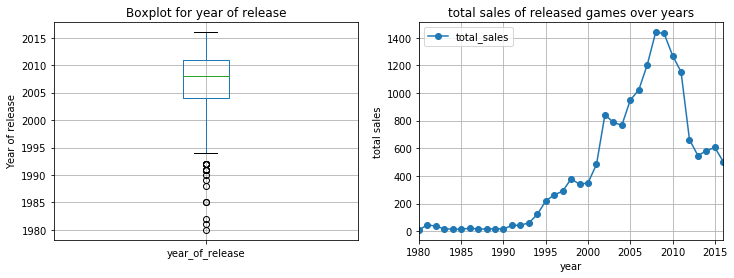

In [29]:
# Grouping data per year
agg_years = games.groupby('year_of_release').agg(count_per_year = ('total_sales', 'count'))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
axes[0] = df_linreg.boxplot(column='year_of_release', ax=axes[0]);
axes[1] = games.groupby('year_of_release') \
               .agg({'total_sales': 'count'}) \
               .plot(grid=True,
                     style='-o',
                     title='total sales of released games over years',
                     ax=axes[1]
                    );
axes[0].set_title('Boxplot for year of release');
axes[0].set_ylabel('Year of release');
axes[1].set_xlabel('year');
axes[1].set_ylabel('total sales');

# Calculating iqr, lower and upper whisker
iqr = games['year_of_release'].quantile(.75) - games['year_of_release'].quantile(.25)
low = games['year_of_release'].quantile(.25) - iqr*1.5
up = games['year_of_release'].quantile(.75) + iqr*1.5
print(low, up)

games_cleaned = games.query('year_of_release > 1993')

> **Observation:**  
> Before 1993 there are less then 100 games per year and the boxplot identifys them as outliers. (removed in games_cleaned)  
> 1995 is the first year with more than 200 games per year

## 3.2. Games over platform

### 3.2.1. Overview all platforms 
> In this step the total sales are summed up per platfor to identify the pest performing platform
> Furthermore the platforms have been divided into handheld, consoles and the rest.  
> Further destinguishing has been carried out in detail for the famous platforms playstation, nintendo, gameboy and xbox

In [30]:
# Geneal differnentation: 
handheld = (2, 3, 8, 10 , 16, 19, 22, 25) #29 but is not in the df anymore due to cleaning 
consoles = (0, 1, 4, 5, 6, 7, 9, 11, 12, 13, 15, 17, 18, 20, 21, 23, 26, 27, 28, 30)
platforms_rest = (14, 24)

nintendo_consoles = (1, 7, 11, 19, 0, 18)
play_stations = (12, 6, 5, 9)
gameboys = (2, 19, 8, 3, 10)
xboxs = (13, 4, 17)

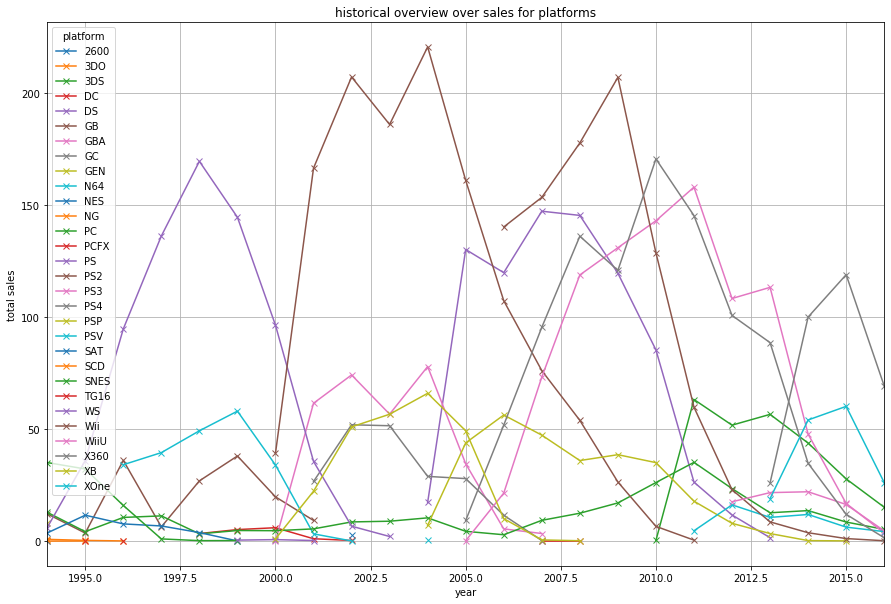

In [31]:
# Aggregating df which contains sales per year per platform
got = games_cleaned.groupby(['year_of_release', 'platform'])["total_sales"].sum().unstack(1)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
got.plot(grid=True,
         style='-x',
         figsize=(15,10),
         title='historical overview over sales for platforms',
         ax=axes
        );
axes.set_xlabel('year');
axes.set_ylabel('total sales');

> **Observarions:**  
> - The variance of sales per platform differs enormous
> - Each platform beside PC has the same course (heavy invreasinc, high phase, quick decreasng). Therefore the typical timespanns of this course needs to be investigated in the next steps.

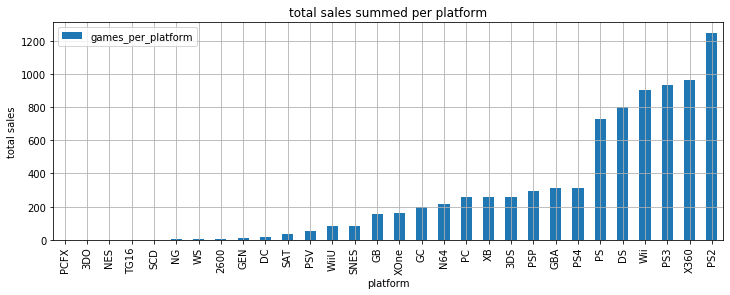

In [32]:
# Plotting total sales summed up per platform
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
games_cleaned.groupby('platform') \
             .agg(games_per_platform = ('total_sales', 'sum')) \
             .sort_values('games_per_platform') \
             .plot(kind='bar',
                   grid=True,
                   figsize=(12,4),
                   title='total sales summed per platform',
                   ax=axes
                  );
axes.set_ylabel('total sales');

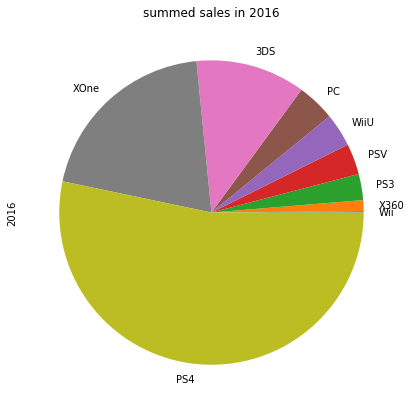

In [33]:
# Determining best actual platform
got.loc[2016].dropna().sort_values().plot.pie(figsize=(7,7),
                                              title='summed sales in 2016',
                                              legend=False
                                             );

In [34]:
print('total_sales_nintendo_consoles:', games.query('platform_cat in @nintendo_consoles').shape[0])
print('total sales playstations:', games.query('platform_cat in @play_stations').shape[0])
print('total sales gameboys:', games.query('platform_cat in @gameboys').shape[0])
print('total sales xboxs:', games.query('platform_cat in @xboxs').shape[0])

total_sales_nintendo_consoles: 2655
total sales playstations: 5046
total sales gameboys: 4106
total sales xboxs: 2317


### 3.2.2. Historical Overview about greatest sale platform playstation
> In this step an overview about sales per year of the ps2 has been created  
> Therefore a dataframe with all the different versions of the ps has been aggregated.  
> After that, the historical development of those platforms has been plotted.

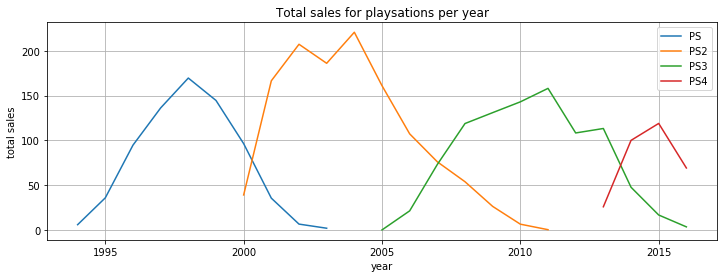

In [35]:
# Function fto extract the platform based on index
get_name_platform = lambda cat: list(platforms.keys())[list(platforms.values()).index(cat)]

# Slicing dataframe and aggregate dataframe
ps_grouped = games_cleaned.query('platform_cat in @play_stations') \
                          .groupby(['platform_cat', 'year_of_release']) \
                          .agg(sales_per_year = ('total_sales', 'sum'))

# Plot total sales for year and platform
fig, ax = plt.subplots(figsize=(12,4))
for console in play_stations:
    name = get_name_platform(console)
    ax.plot(ps_grouped.loc[console], label=name)
ax.legend();
ax.grid();
ax.set_xlabel('year');
ax.set_ylabel('total sales');
ax.set_title('Total sales for playsations per year');

> **Observation:**
> - The sales of the best performing platform (ps2) start in 2000 and reaching the top in 2004. From there on the sales are constantly going down
> - The platforms itself have the same carateristical look, once the new platform is coming out, the sales of the old one decreases and the sales of the new one increases.
> - THe same research will be carried out for Xbox, Wii and Gameboy

### 3.2.3. Historical overview about rest of platforms (nintendo, gameboy and xbox)

> **Observations:**  
> - Wii was the best sold console of nintendo  
> - DS was the best gameboy  
> - X360 had the most sold agmes of xboxes  
> - Also here the pattern that once a new platform is published, the old one fades.  

### 3.2.4. Historical overview about console types:
> In this chapter the historic overview about consle types (Handheld, consoles platforms_rest) has been carried out

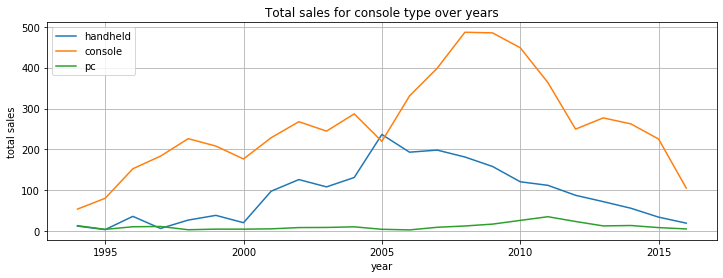

In [37]:
# Defining funcion to cathegorize platforms
def cat_plat(plat_number):
    if plat_number in handheld:
        return 'handheld'
    elif plat_number in consoles:
        return 'console'
    return 'pc'

# Aggregating dataframe
cons_type = games_cleaned[['total_sales', 'year_of_release', 'platform', 'platform_cat']].copy()
cons_type['con_type'] = cons_type['platform_cat'].apply(cat_plat)
cons_type_agg = cons_type.groupby(['con_type', 'year_of_release'])['total_sales'].agg(test = ('total_sales', 'sum'))

# Plotting data
fig, ax = plt.subplots(figsize=(12,4))
for tp in ('handheld', 'console', 'pc'):
    ax.plot(cons_type_agg.loc[tp], label=tp)
ax.legend(loc=2);
ax.grid(); 
ax.set_xlabel('year');
ax.set_ylabel('total sales');
ax.set_title(f'Total sales for console type over years');

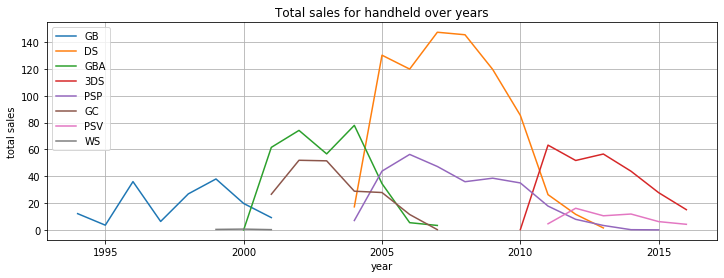

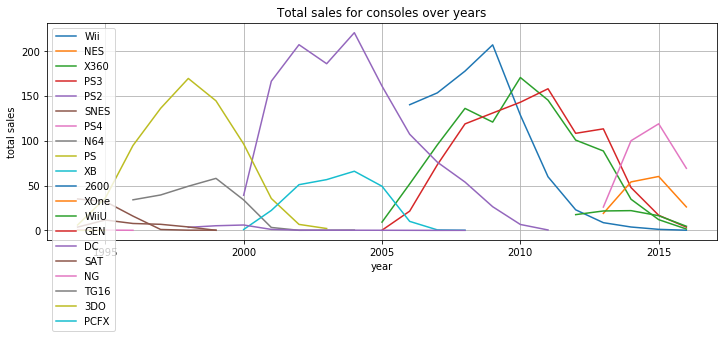

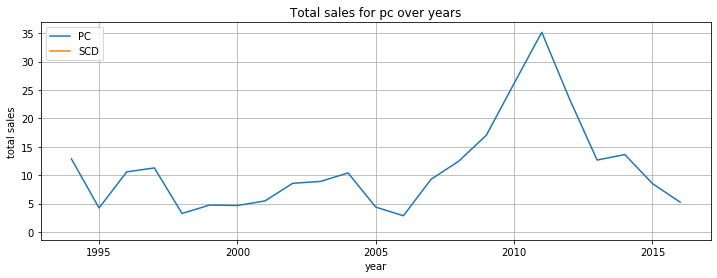

In [38]:
# Slicing dataframe and aggregate dataframe
handheld_grouped = games_cleaned.query('platform_cat in @handheld') \
                                .groupby(['platform_cat', 'year_of_release']) \
                                .agg(sales_per_year = ('total_sales', 'sum'))

consoles_grouped = games_cleaned.query('platform_cat in @consoles') \
                                .groupby(['platform_cat', 'year_of_release']) \
                                .agg(sales_per_year = ('total_sales', 'sum'))


rest_grouped = games_cleaned.query('platform_cat in @platforms_rest') \
                            .groupby(['platform_cat', 'year_of_release']) \
                            .agg(sales_per_year = ('total_sales', 'sum'))

dfs_grouped = (handheld_grouped, consoles_grouped, rest_grouped)
console_type = ('handheld', 'consoles', 'pc')
idx=0
# Plot total sales for year and platform
for platform_type, df in zip((handheld, consoles, platforms_rest), dfs_grouped):
    fig, ax = plt.subplots(figsize=(12,4))
    
    for console in platform_type:
        name = get_name_platform(console)
        ax.plot(df.loc[console], label=name)
    ax.legend(loc=2);
    ax.grid(); 
    ax.set_xlabel('year');
    ax.set_ylabel('total sales');
    ax.set_title(f'Total sales for {console_type[idx]} over years');
    idx+=1

> **Observations:**  
> - Handheld consoles were popular until 2010 (around that time the Smartphone was established) Since 2011 there is no new handheld console released.  
> - PC games had a spike in 2010 but beside that the sales are more or less in a consotant corridor between 4 and 15   
> - Xbox and Playstation are publishing their consoles at the same times.
> - The total of consoles is bigger than the total of handheld and pc together -> select consoles for campagin

### 3.2.5. Average lifetime of consoles

> To determine the lifespan of a platform, the difference between the first and the last sale has been determined.  
> In preparation for that the steps have been carried out:  
> - A threshold has been determined below a platform is considered 'dead'. This decision has been made based on the graphs above which show, that some consoles have long periods of fading away  
> - The top 6 Platforms has been choosen becuase after platform 6 the total sales drop around 50% (without ps4, xOne and WiiU because they are to new to consider them in the lifespan estimation)
> - PC with a lifetime of 22 years is filtered out

In [39]:
# Defining lambda for aggregating lifespan
calc_livespan = lambda series: (series.max() - series.min())

# Aggregating dataframe
livespan = games_cleaned.groupby(['platform', 'year_of_release']) \
                             .agg(sales_per_year = ('total_sales', 'sum'))

# Removing entries below threshold and PC,PS4 and XOne
livespan = livespan.query("(sales_per_year > 1.5) and (platform not in ('PC', 'PS4', 'XOne', 'WiiU'))").reset_index()

# Calculating Livespanns of platform
livespan_agg = livespan.groupby('platform') \
                       .agg(
                                livespan = ('year_of_release', calc_livespan),
                                total_sales = ('sales_per_year', 'sum'),
                                average_sales = ('sales_per_year', 'mean')
                            ) \
                       .sort_values('total_sales', ascending=False)
display(livespan_agg)
top_platforms = livespan_agg[0:6]
top_platforms.describe()

,livespan,total_sales,average_sales
platform,,,
PS2,10,1250.47,113.679091
X360,11,966.67,80.555833
PS3,10,935.00,85.000000
Wii,8,901.99,100.221111
DS,9,804.26,80.426000
PS,9,727.58,72.758000
GBA,6,313.66,44.808571
PSP,9,293.21,29.321000
3DS,5,258.21,43.035000


,livespan,total_sales,average_sales
count,6.000000,6.000000,6.000000
mean,9.500000,930.995000,88.773339
std,1.048809,179.796404,15.226836
min,8.000000,727.580000,72.758000
25%,9.000000,828.692500,80.458458
50%,9.500000,918.495000,82.777917
75%,10.000000,958.752500,96.415833
max,11.000000,1250.470000,113.679091


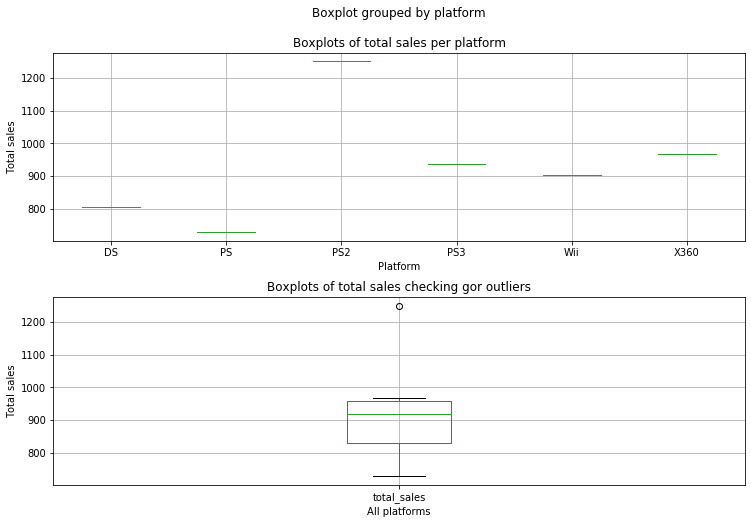

In [40]:
# Further infomation about the relation of total sales after platforms
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))
plt.subplots_adjust(hspace=0.3)

axes[0] = top_platforms.boxplot(by='platform', column='total_sales', ax=axes[0])
axes[0].set_xlabel('Platform');
axes[0].set_ylabel('Total sales');
axes[0].set_title('Boxplots of total sales per platform')

axes[1] = top_platforms.boxplot(column='total_sales', ax=axes[1])
axes[1].set_xlabel('All platforms')
axes[1].set_ylabel('Total sales');
axes[1].set_title('\nBoxplots of total sales checking gor outliers');


> **Observation:** 
> - The average lifespan of a platform is 9.5 years in middle  
> - Therefore only platforms that are not older than 4 years as well as PC should be considered for the campagin in 2017  
> - Ranking for games by total sales and mean sales per year differ  
> \-\> XOne, PS4 and PC or 3DS should be considered as platforms  
> \-\> For the game genre and rating the data of the last 10 years should be considered (to have a bit of idea where the values are coming from)

In [41]:
# Slicing dataframe
single_generation = games_cleaned.query('year_of_release >= 2006')

## 3.3. Influence reviews on sales for PS4
> In this step the influence of professional reviews and user reviews regarding total sales have been carried out  
> PS4 has been choosed because has the current highest total sales and is currently at the marked for half its lifetime so that conclulsions which are drawn within this analysis are representative for the campagin in 2017

### 3.3.1. General recap to chapter 2.3.3.
> The basic correlation of ratings and total sales has already been carried out for the whole dataset and is shown again below (Look  2.3.3.3.1. up for details)  
> \-\> This correlation matrix shows a medium correlation between critic score and total sales and only low correlation between user_score and only low correlation between user_rating and toal sales. Whereas the scatterplots show that user_score and total sales still have a correlation, even if not linear
> 2.3.3.3.1.

,user_score,critic_score,total_sales
user_score,1.000000,0.548455,0.087427
critic_score,0.548455,1.000000,0.231083
total_sales,0.087427,0.231083,1.000000


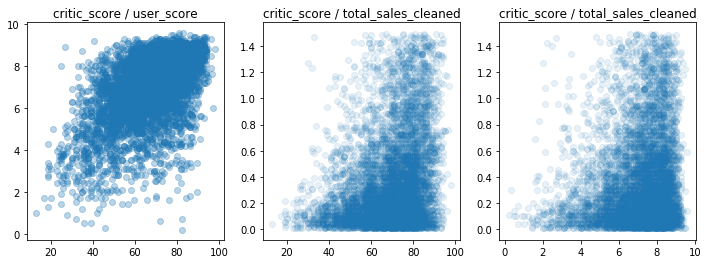

In [42]:
# Showing data of chapter 2.3.3.3.1.
display(stat_res[['user_score', 'critic_score', 'total_sales']].corr())

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
axes[0].scatter(df_linreg_cleaned['critic_score'], df_linreg_cleaned['user_score'], alpha=0.3);
axes[0].set_title('critic_score / user_score')

axes[1].scatter(df_linreg_cleaned['critic_score'], df_linreg_cleaned['total_sales'], alpha=0.1);
axes[1].set_title('critic_score / total_sales_cleaned')

axes[2].scatter(df_linreg_cleaned['user_score'], df_linreg_cleaned['total_sales'], alpha=0.1);
axes[2].set_title('critic_score / total_sales_cleaned')

plt.show()

### 3.3.2. Reviews and Sales on PS4
> To analyse the general correlation between user/critic scores and total sales, the platform with the current higheds sales has been choosen.

In [75]:
# Slicing dataframe to only valid entries for ps4
df_ps4 = games_cleaned.query("platform == 'PS4'")

# Boolean mask for valid ratings
valid_games = ((games_cleaned['user_score'] <= 10) & 
               (games_cleaned['critic_score'] <= 100) &
               (games_cleaned['tbd']==0)
              )

# Agregating fataframe for corrmatrix
df_ps4_valid_ratings = df_ps4.loc[valid_games, ['total_sales', 'critic_score', 'user_score']]
df_ps4_valid_ratings_control = df_ps4.query('year_of_release >= 2014') \
                                     .loc[valid_games, ['total_sales', 'critic_score', 'user_score']]

# Checkling timeframe in that ps4 gamnes were published
df_ps4.loc[valid_games, ['year_of_release', 'user_score']] \
      .groupby('year_of_release') \
      .agg(games_per_year = ('user_score', 'count'))

,games_per_year
year_of_release,
2013,16
2014,59
2015,105
2016,102


> **Observation:**  
> There are games from 2013-2016.  
> -> To see if the 16 games in 2013 have an influence, the correlation matrixes are done from 2013-2016 and 2014-2016.

Correlation Matrix 2013-2016


,total_sales,critic_score,user_score
total_sales,1.000000,0.390690,-0.024658
critic_score,0.390690,1.000000,0.563632
user_score,-0.024658,0.563632,1.000000


Correlation Matrix 2014-2016


,total_sales,critic_score,user_score
total_sales,1.000000,0.387800,-0.030083
critic_score,0.387800,1.000000,0.551992
user_score,-0.030083,0.551992,1.000000


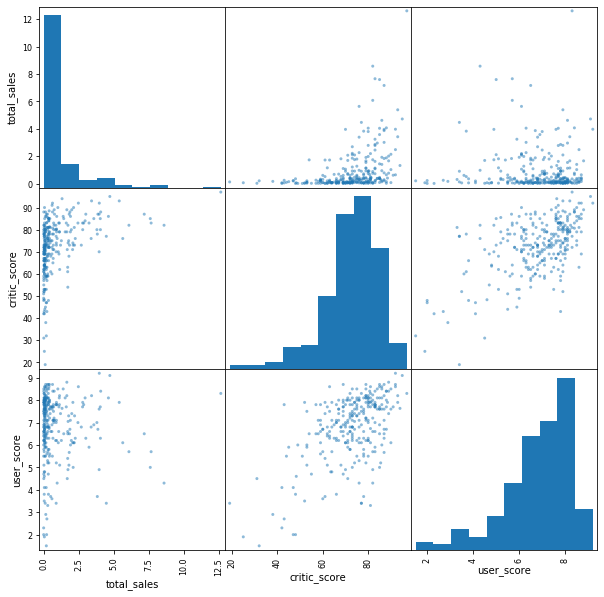

In [74]:
# Displaying Corrmatrix and scatterplotts
print('Correlation Matrix 2013-2016')
display(df_ps4_valid_ratings.corr())
print('Correlation Matrix 2014-2016')
display(df_ps4_valid_ratings_control.corr())
pd.plotting.scatter_matrix(df_ps4_valid_ratings, figsize=(10,10), grid=True);

> -> The correlation differences between the data of 2013-2016 and 2014-2016 are only marginal.

In [45]:
# Determining logarithmic linear correlation
print('critic score, total sales correlation')
print(np.corrcoef(
                  df_ps4_valid_ratings['critic_score'],
                  np.log(df_ps4_valid_ratings['total_sales'].values)
                 )
     )
print('\n user score total sales correlation')
print(np.corrcoef(
                  df_ps4_valid_ratings['user_score'],
                  np.log(df_ps4_valid_ratings['total_sales'].values)
                )
     )

critic score, total sales correlation
[[1.         0.49052068]
 [0.49052068 1.        ]]

 user score total sales correlation
[[1.         0.04008012]
 [0.04008012 1.        ]]


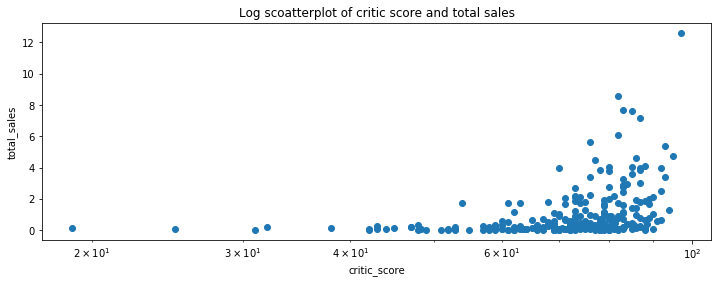

In [46]:
# Plotting log. scatterplot
fig, ax = plt.subplots(figsize=(12,4))
ax.scatter(df_ps4_valid_ratings['critic_score'], df_ps4_valid_ratings['total_sales'])
ax.set_title('Log scoatterplot of critic score and total sales')
ax.set_xlabel('critic_score')
ax.set_ylabel('total_sales')
ax.set_xscale('log')

> **Conclusion**:
> - The **Linear** correlation between critic score and total sales decrased whereas the linear correlation between user and critic score increased.  
> - With a logarithmic scale there it shows that total sales is correlated to critic scores but not to user scores

## 3.4. Identify profitable genre
> In this step the influence of the genre on the toal sales has been invesigated. 

### 3.4.1. General overview over one lifespann
> To get a general idea how the total sales after genres have been evolved over time, in this step the genres are plotted for one complete livespann of consoles

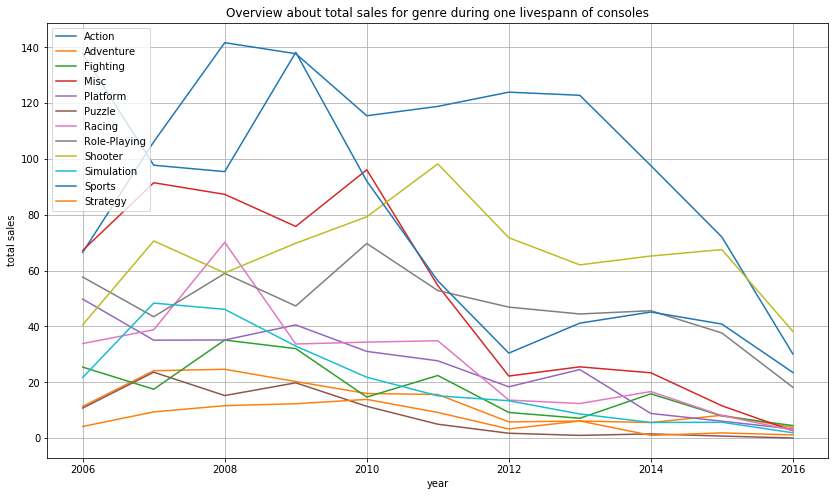

In [47]:
# Aggregating DF
got_agg = single_generation.groupby(['genre', 'year_of_release']) \
                             .agg(total_sales = ('total_sales', 'sum')) 

# Plotting total sales per genre over years
fig, ax = plt.subplots(figsize=(14,8))
for gen in got_agg.unstack(1).index:
    ax.plot(got_agg.loc[gen], label=gen)
ax.legend(loc=2);
ax.grid(); 
ax.set_xlabel('year');
ax.set_ylabel('total sales');
ax.set_title('Overview about total sales for genre during one livespann of consoles');

> **Observation:**  
> Until 2014 the total sales grouped by genre are varying too much.  
> -> For further investigations containing genre only data from 2014 on is used.

### 3.4.2. Identifying genre after 2014
> Due to the observations in the previous step, we carry out the analysis for the next years campagin based on the data after 2014

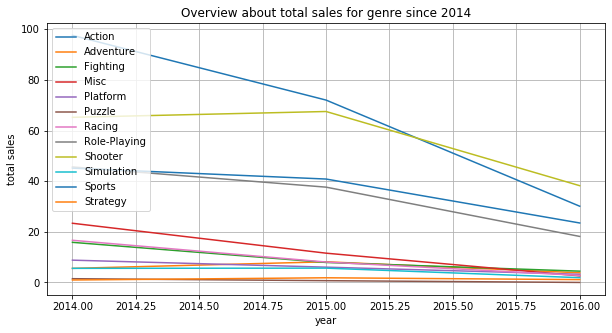

In [80]:
# Slicing  dataframe for entries 2014-2016
single_gen_14 = single_generation.query('year_of_release >= 2014')

# Aggregatring df for plt
got_singen_agg = single_gen_14.groupby(['genre', 'year_of_release']) \
                                  .agg(total_sales = ('total_sales', 'sum')) 

# Plotting total sales per genre over years
fig, ax = plt.subplots(figsize=(10,5))
for gen in got_singen_agg.unstack(1).index:
    ax.plot(got_singen_agg.loc[gen], label=gen)
ax.legend(loc=2);
ax.grid(); 
ax.set_xlabel('year');
ax.set_ylabel('total sales');
ax.set_title('Overview about total sales for genre since 2014');

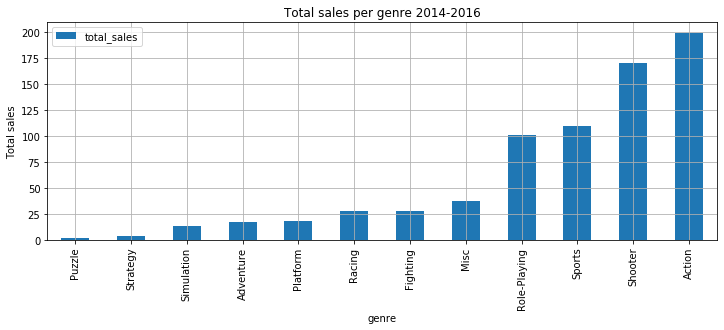

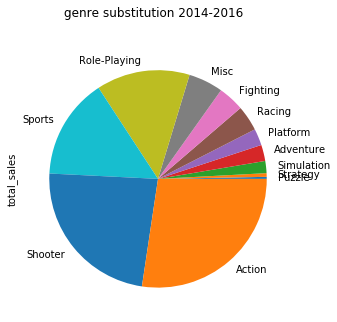

In [81]:
# Plotting 
fig, ax = plt.subplots(figsize=(12,4))
single_gen_14.groupby('genre') \
             .agg(total_sales = ('total_sales', 'sum')) \
             .sort_values(by='total_sales') \
             .plot(kind='bar',
                   grid=True,
                   figsize=(12,4),
                   ax=ax
                  );
ax.set_ylabel('Total sales');
ax.set_title('Total sales per genre 2014-2016')
plt.show;

single_gen_14.groupby('genre') \
             .agg(total_sales = ('total_sales', 'sum')) \
             .sort_values(by='total_sales') \
             .plot(kind='pie',
                   subplots=True,
                   legend=False,
                   title='genre substitution 2014-2016',
                   figsize=(5,5));
plt.show()

> **Obersvations:**  
> - 'Fast' games like Action sport and scooters have much higher sales than 'slow' games like simultions and complex games like strategy and puzzles  
> - Action, shooter, sports and role playing are contining more than 75% of the total sales
> - For the game were planing we should check the choosen platform for potential for a action, sports or shooter game 


## 3.5. Sales after Region
> In this chapter the sales have been analyzed regarding their markets (North America, Europe and Japan)  
> Therefore the following aspects have been analyzed:
> - Top platforms after regions
> - Top genres after region
> - Impact of ESRB after region

### 3.5.1. Top 5 platforms after region
For each region (NA, EU, JP), determine:
The top five platforms. Describe variations in their market shares from region to region.


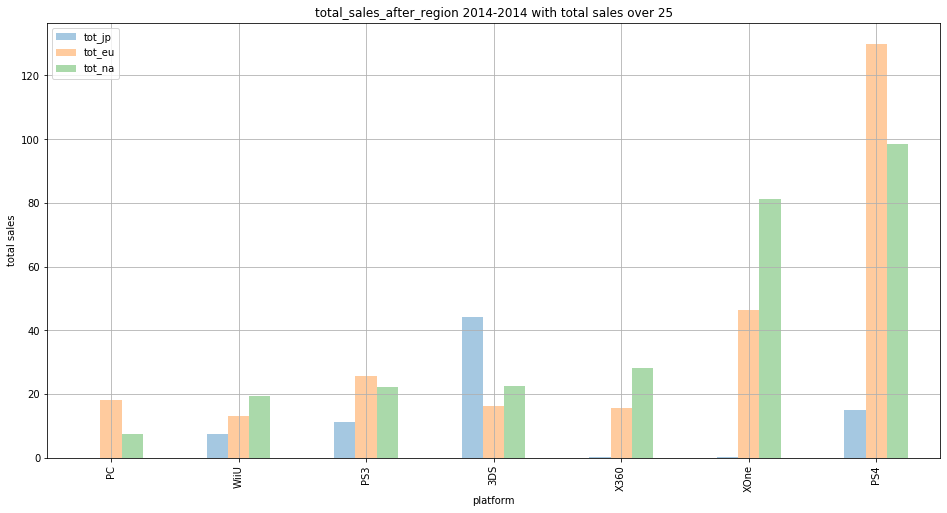

In [82]:
# Aggregate data 
platforms_region = single_gen_14.groupby('platform').agg(tot_all_regions = ('total_sales', 'sum'),
                                                         tot_na = ('na_sales', 'sum'),
                                                         tot_eu = ('eu_sales', 'sum'),
                                                         tot_jp = ('jp_sales', 'sum')
                                                        )
#Plot sliced data in one bar chart
fig, ax = plt.subplots(figsize=(12,4))
platforms_region.query('tot_all_regions > 25')[['tot_jp', 'tot_eu', 'tot_na']] \
                .sort_values('tot_na') \
                .plot(kind='bar',
                      grid=True, 
                      figsize=(16,8),  
                      ax=ax,
                      legend=True,
                      alpha = 0.4
                     );
ax.set_title('total_sales_after_region 2014-2014 with total sales over 25')
ax.set_xlabel('platform')
ax.set_ylabel('total sales')
plt.show();

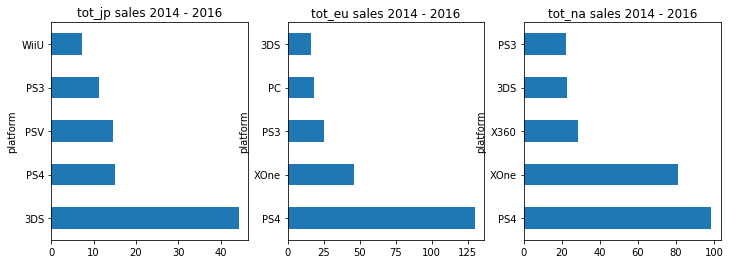

In [83]:
# Plot in one barchart for each region
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for idx, region in enumerate(['tot_jp', 'tot_eu', 'tot_na']):
    tit = region + ' sales 2014 - 2016'
    platforms_region[region].sort_values(ascending=False)[0:5].plot(
                                                                    kind='barh',
                                                                    ax=axes[idx],
                                                                    title=tit
                                                                    )

> **Observations**
> - Japan prefers biggest market is 3DS (before PS4)
> - eu prefers playstation over xbox
> - Na sales of Xbox and PS quite similar
> - disributions of total sales per platform shown

### 3.5.2 Top 5 genres after region

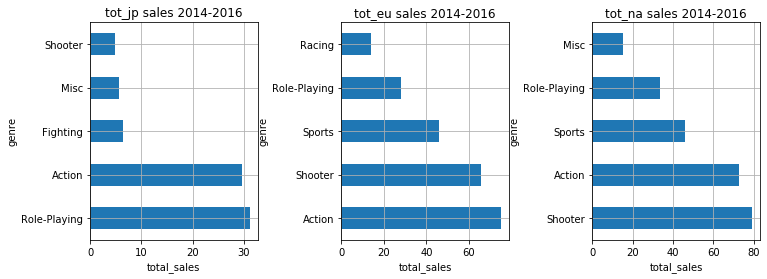

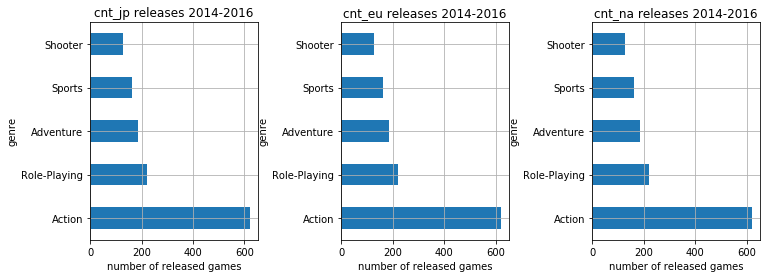

In [89]:
# Agregating after genres
genres_region = single_gen_14.groupby('genre').agg(tot_all_regions = ('total_sales', 'sum'),
                                                   tot_na = ('na_sales', 'sum'),
                                                   cnt_na = ('na_sales', 'count'),
                                                   tot_eu = ('eu_sales', 'sum'),
                                                   cnt_eu = ('eu_sales', 'count'),
                                                   tot_jp = ('jp_sales', 'sum'),
                                                   cnt_jp = ('jp_sales', 'count')
                                                  )  
#Plotting the top 5 genres after platform
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
plt.subplots_adjust(hspace=0.3,wspace=0.5)
for idx, region in enumerate(['tot_jp', 'tot_eu', 'tot_na']):
    genres_region[region].sort_values(ascending=False)[0:5] \
                          .plot(
                                kind='barh',
                                ax=axes[idx],
                                grid=True,
                                title=region + ' sales 2014-2016'
                                )
    axes[idx].set_xlabel('total_sales')
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
plt.subplots_adjust(hspace=0.3,wspace=0.5)
for idx, region in enumerate(['cnt_jp', 'cnt_eu', 'cnt_na']):
    genres_region[region].sort_values(ascending=False)[0:5] \
                          .plot(
                                kind='barh',
                                ax=axes[idx],
                                grid=True,
                                title=region + ' releases 2014-2016'
                                )
    axes[idx].set_xlabel('number of released games')

> **Observations:**  
> - Distribution of released nearly identical so the different sales represents only the taste of the market  
> - Na and eu have the same distribution for sales
> - For our game, consider the market for selecting the game genre (Focus on na/eu because those markets have much more sales)

>**Explanations:**
> The distribution of the total sales are kind of representing the culture of the local market. Thus the EU sales and NA sales are simmilar because they have similar cultures. Whereas JP has a completely different culture and social values.  
> That shooters and action are twisted around in eu/NA can be based on the fact, that in NA guns are not as restricted as in the eu.

> This cultural background and values should be considered within the campagain for 2017. (Make a different campagain for each market or if only one focus on NA/EU

> The equal numbers of released games in 2014-2016 is based on the fact, that nearly every game is released in all three markets. That behaviour can be explained by te fact, that the most workload in developing a game is needed by developing the game itself. The translation itself is a relative irrelevant factor (time and effortwise) by developing a new game. Thus to maximize profits, the game companies are translating their games for all three markets or just publishing it in the OV what does not take any additional effort.


### 3.5.3. Effect of ESRB Ratings in regions
> In this chapter the effect of ESRB rating on sales has been determined.  
> Therefore the data has grouped by genre and afterwards by rating. 

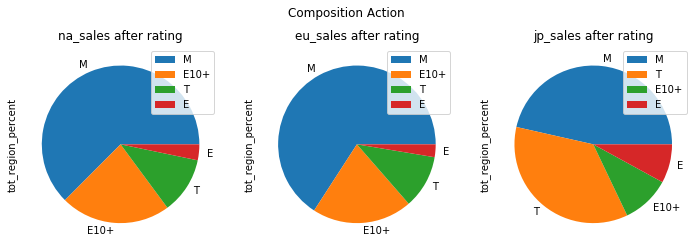

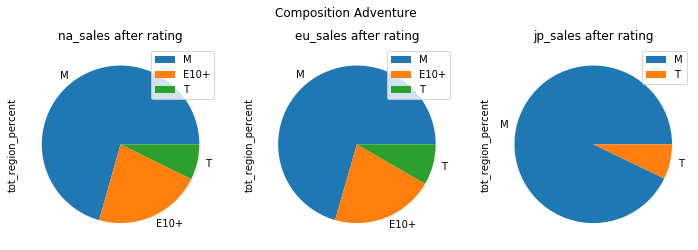

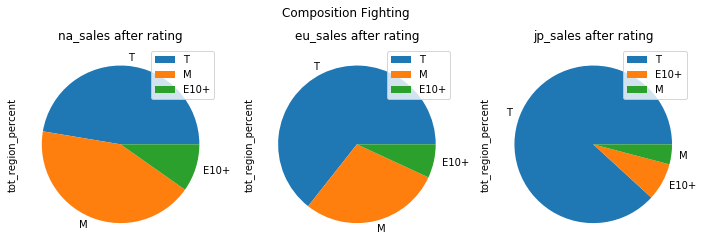

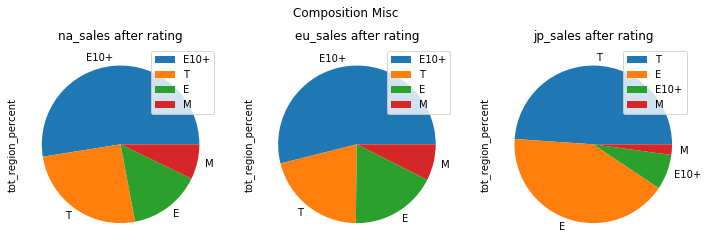

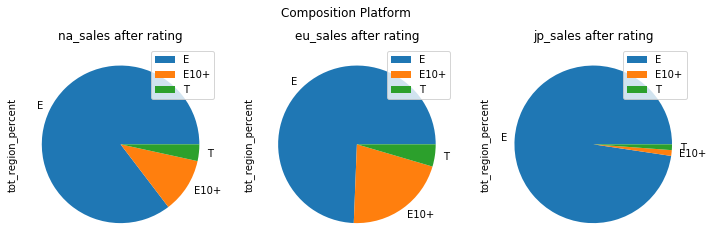

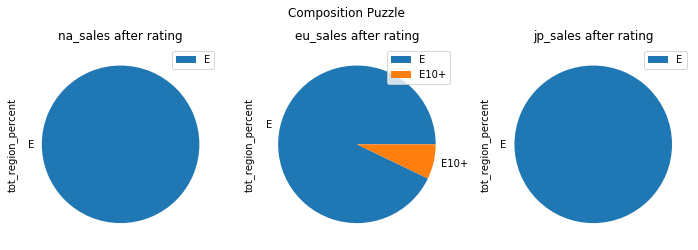

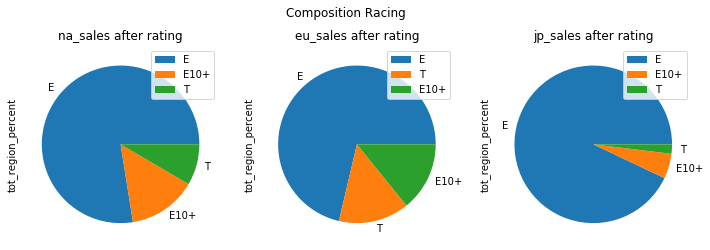

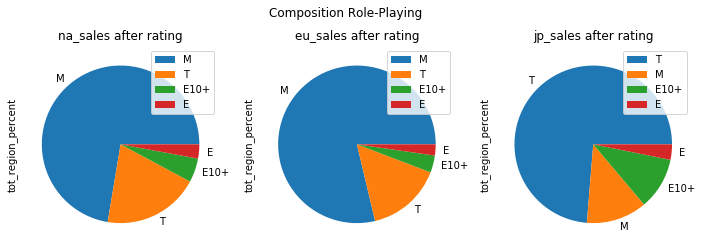

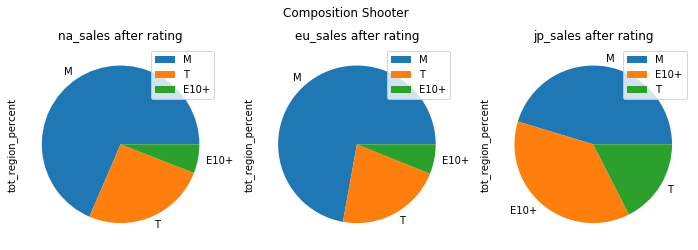

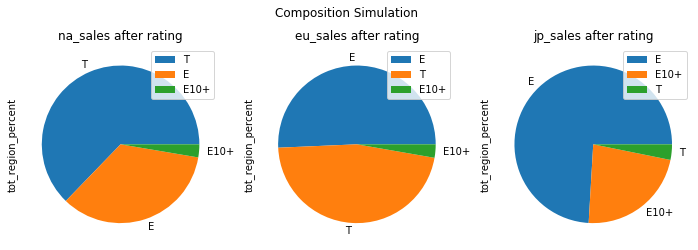

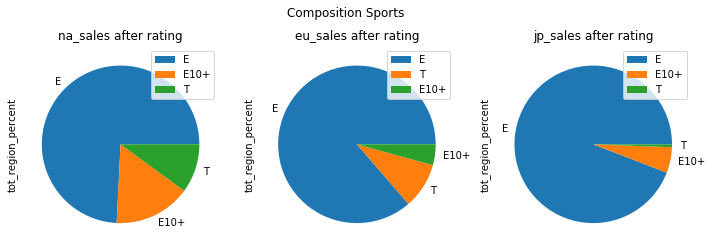

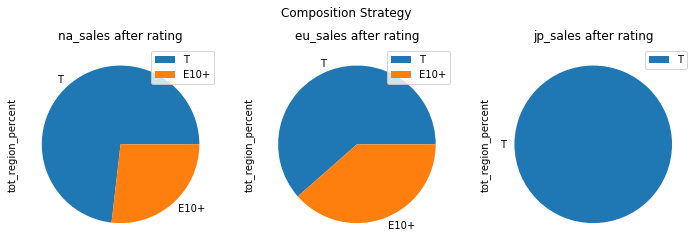

In [52]:
grouped_genre= single_gen_14.query("rating not in ('unknown', 'RP')") \
                                .groupby(['genre'])

for genre, sales in grouped_genre:
    # Aggregating needed columns
    cols = ['rating', 'na_sales', 'eu_sales', 'jp_sales', 'total_sales']
    title_str = 'Percentage of agerating of genre:' + ' ' + genre
    
    # Plotting pie chart for each genre for each rating for each market
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
    fig.suptitle('Composition' + ' ' + genre)
    for i, region in enumerate(cols[1:4]):
        total_sales_region = sales[sales[region] > 0][region].sum()
        rating_region = sales[sales[region] > 0].groupby('rating') \
                                                .agg(tot_region = (region, 'sum')) \
                                                .sort_values('tot_region', ascending=False)
            
        rating_region['tot_region_percent'] = rating_region['tot_region'] / total_sales_region
        
        rating_region['tot_region_percent'].plot(kind='pie', ax=axes[i], subplots=True)
        axes[i].legend();
        axes[i].set_title(region + ' ' + 'after rating')
    plt.plot();

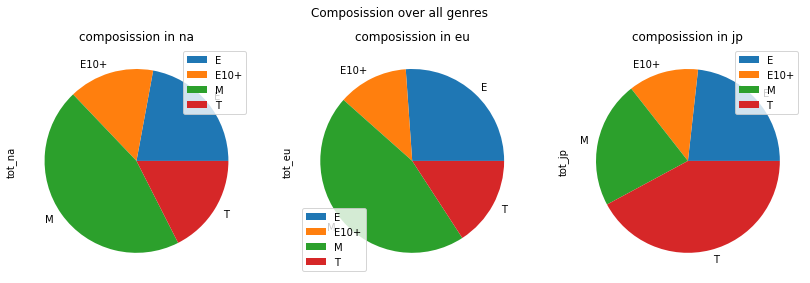

In [53]:
grouped_esrb = single_gen_14.query("rating not in ('unknown', 'RP')") \
                                .groupby(['rating'])

test = grouped_esrb.agg(
                                  tot_na = ('na_sales', 'sum'),
                                  tot_eu = ('eu_sales', 'sum'),
                                  tot_jp = ('jp_sales', 'sum'),
                                )

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 4.5))
fig.suptitle('Composission over all genres')
for i, col in enumerate(test.columns):
    test[col].plot(kind='pie', ax=axes[i])
    axes[i].legend();
    axes[i].set_title('composission in' + ' ' + col.split('_')[1])

> **Observations**:   
> - In Japan the games with lower agre requirements have higher buy rates than in NA/EU  
> - The Age rating and total sales differ from genre to genre, so the age rating should be considered for the genre the game of the company should be in.    
> - Considering Action/Shooter as top seller in the two bigges markets (eu/na), the perfect rating would be M (From 17 on) and for sports (E)

# 4. Statistical data analysis

## 4.1. XOne and PC scores 
>  this step of the SDA, the user and critic scores have for Xbox_one and PC have been analyzed:

> **Test parameter for both tests**  
> alpha = 0.05 (5%)  
> A two sided test has been performed because it does not matter in which direction the average rating differs. 

> **For user_score and critic_score**  
>
> **Test hypothesis levene Test**  
> **H0:** Variance xone = variance pc  
> **H1:** Variance xone <> variance pc

> **Test hypothesis rating tesing**  
> **H0**: Average user_scores Xbox One = Average user_scores of PC  
> **H1**: Average user_scores Xbox One <> Average user_scores of PC

> This analysis has been carried out in three steps:
> 1. Getting general overview
> 2. Determine if distibution is the same
> 3. Analyze the means

,user_scores_xone,critic_score_xone
mean,6.660344,73.846397
std,1.329528,12.351667


,user_score_pc,critic_score_pc
mean,6.318427,75.523112
std,1.665468,10.739898


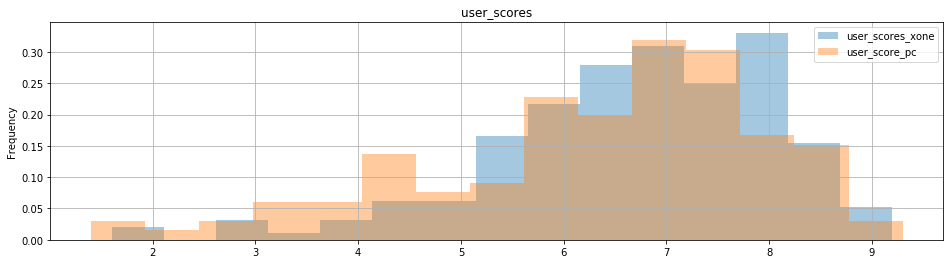

,user_scores_xone,critic_score_xone
mean,6.660344,73.846397
std,1.329528,12.351667


,user_score_pc,critic_score_pc
mean,6.318427,75.523112
std,1.665468,10.739898


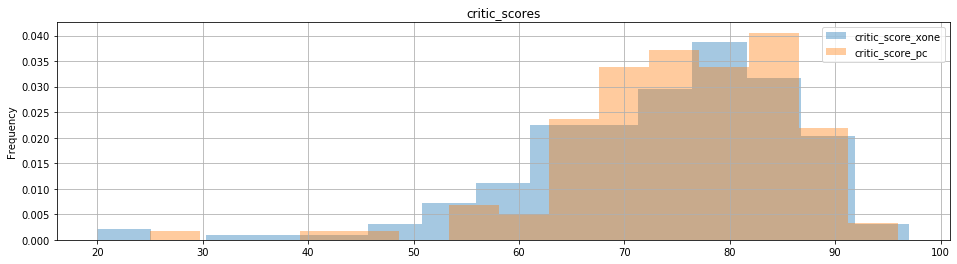

In [93]:
# Slicing dataframes
rating_xone = single_gen_14.query("(platform == 'XOne') and \
                                   (user_score <= 10) and \
                                   (critic_score <= 100)")[['user_score', 'critic_score']]
rating_xone.columns = ['user_scores_xone', 'critic_score_xone']

rating_pc = single_gen_14.query("(platform == 'PC') and \
                                 (user_score <= 10) and \
                                 (critic_score <= 100)")[['user_score', 'critic_score']]
rating_pc.columns = ['user_score_pc', 'critic_score_pc']

# Plotting hists for general overview
for idx, score in enumerate(('user_scores', 'critic_scores')):
    for df in (rating_xone, rating_pc):
        display(df.agg([np.mean, np.std]))
        df[df.columns[idx]].plot(kind='hist',
                                    density=True,
                                    alpha=0.4,
                                    grid=True, 
                                    figsize=(16,4), 
                                    bins=15, 
                                    title= score, 
                                    legend=True
                                   ) 
    plt.show()

In [94]:
# Determining variance
for col in range(2):
    print(
          f'Results for {rating_xone.columns[col]}: ',
          st.levene(rating_xone.iloc[:,col],
                    rating_pc.iloc[:,col])
         )

Results for user_scores_xone:  LeveneResult(statistic=5.937565801700203, pvalue=0.015376740011137468)
Results for critic_score_xone:  LeveneResult(statistic=1.4261465275436127, pvalue=0.23329570790364274)


> **Observations**  
> 1. For user scores: pvalue < alpha  
> -> H0 rejected, Means differ -> equal_var=False

> 2. For critic scores: pvalue > alpha  
> -> Failed to reject H0, Means can be considered as equal -> equal_var=True

In [100]:
# Carrying out SDA
for col in range(2):

    print(
          f'Results for {rating_xone.columns[col]}: ',
          st.ttest_ind(rating_xone.iloc[:,col],
                       rating_pc.iloc[:,col],
                       equal_var=bool(col) # False user, True critic
                    )
         )

Results for user_scores_xone:  Ttest_indResult(statistic=1.928168858952675, pvalue=0.05510047002275838)
Results for critic_score_xone:  Ttest_indResult(statistic=-1.2412484192658435, pvalue=0.21544046596246264)


> **Observations**  
> 1. For user scores: pvalue > alpha  
> -> Failed to reject H0, Means can be considered as equal

> 2. For critic scores: pvalue > alpha  
> -> Failed to reject H0, Means can be considered as equal

> Ratings over platform seem to be the same (at least pc and xbox, rest also has to be tested)


## 4.2. Action vs. Sports Ratings

> **Test parameter for both tests**  
> alpha = 0.05 (5%)  
> A two sided test has been performed because it does not matter in which direction the average rating differs. 

> **For user_score and critic_score**  
>
> **Test hypothesis levene Test**  
> **H0:** Variance action = variance sport   
> **H1:** Variance action <> variance sport

> **Test hypothesis rating tesing**  
> **H0**: Average user_scores Action = Average user_scores of Sport  
> **H1**: Average user_scores Action <> Average user_scores of Sport

> This analysis has been carried out in three steps:
> 1. Getting general overview
> 2. Determine if distibution is the same
> 3. Analyze the means

,user_scores_action,critic_score_action
mean,6.809827,71.271006
std,1.300283,11.231354


,user_scores_sport,critic_score_sport
mean,5.289327,69.215628
std,1.801901,18.977329


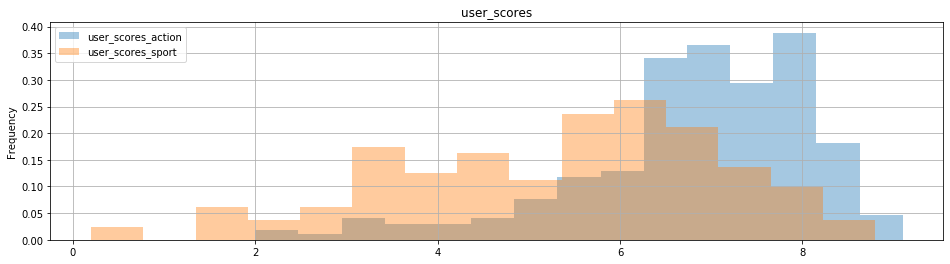

,user_scores_action,critic_score_action
mean,6.809827,71.271006
std,1.300283,11.231354


,user_scores_sport,critic_score_sport
mean,5.289327,69.215628
std,1.801901,18.977329


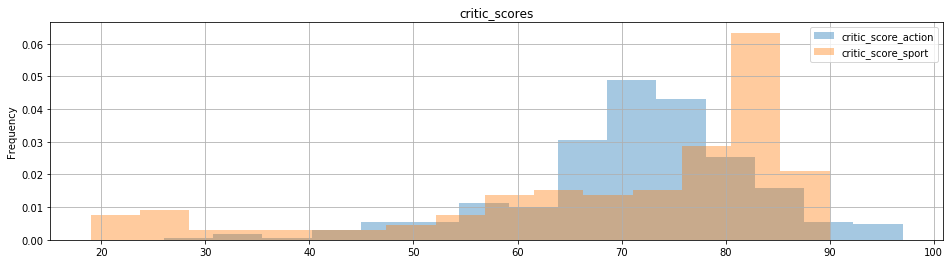

In [57]:
# Slicing dataframes
scores_action = single_gen_14.query("(genre == 'Action') and \
                                   (user_score <= 10) and \
                                   (critic_score <= 100)")[['user_score', 'critic_score']]
scores_action.columns = ['user_scores_action', 'critic_score_action']

scores_sport = single_gen_14.query("(genre == 'Sports') and \
                                   (user_score <= 10) and \
                                   (critic_score <= 100)")[['user_score', 'critic_score']]
scores_sport.columns = ['user_scores_sport', 'critic_score_sport']

# Plotting hists for general overview
for idx, score in enumerate(('user_scores', 'critic_scores')):
    for df in (scores_action, scores_sport):
        display(df.agg([np.mean, np.std]))
        df[df.columns[idx]].plot(kind='hist',
                                    density=True,
                                    alpha=0.4,
                                    grid=True, 
                                    figsize=(16,4), 
                                    bins=15, 
                                    title= score, 
                                    legend=True
                                   ) 
    plt.show()

In [58]:
# Determining variance
for col in range(2):
    print(f'Results for {scores_action.columns[col]}: ',
          st.levene(scores_action.iloc[:,col],
                    scores_sport.iloc[:,col]))

Results for user_scores_action:  LeveneResult(statistic=26.826931697144765, pvalue=3.2388377051163567e-07)
Results for critic_score_action:  LeveneResult(statistic=29.314975698613335, pvalue=9.592767579978957e-08)


> For both cases pvalue < alpha  
> -> H0 rejected  
> -> Means differ -> equal_var=False

In [101]:
# Carrying out SDA
for col in range(2):
    print(
          f'Results for {scores_action.columns[col]}: ',
          st.ttest_ind(scores_action.iloc[:,col],
                       scores_sport.iloc[:,col],
                       equal_var=False
                    )
         )

Results for user_scores_action:  Ttest_indResult(statistic=9.10277665220878, pvalue=9.597823437801697e-17)
Results for critic_score_action:  Ttest_indResult(statistic=1.202037934398852, pvalue=0.2309430843261142)


> **Observations**  
> 1. For user scores: pvalue < alpha  
> -> H0 rejected, Means can not be considered as equal

> 2. For critic scores: pvalue > alpha  
> -> Failed to reject H0, means can  be considered as equal

> User ratings over genere differ drastically whereas critic scores are distributed more or less similar over genres (at least actiom and sport, the rest needs to be tested to make a conclution.

# 5. Conclution
> All the points below are depending on the target market but for this analysis it is assumed that profit should be maximized

> For the campagin for 2017 we should start a campagin which fullfills the following criteria:  
> -**Platform**: PS4 (PC and XOne can also be considered)  
> -**genre:**: Action, shoter or sport   
> -**Both ratings (professional and user**) should be collected for (if done) beta testing  
> -**Age rating**: M  
But beside of thos factors, it should maybe considered to develop a campagin for a game for the next generation of consoles (PS5 / Xbox X) because the newest verions are aleady 4-5 Years on the market and already crossed their top of sales (at least if the trend is continuing as expected and there is nothing in the data what shows the opposite)   
> Maybe it would also be interessting to investigate mobile games which basically killed the handheld platforms around 2010 (except 3DS)

> **In General**:
> - Within this project the data has been preprocessed:  
>     - Filling missing values
>     - Cathegorizing 
>     - Adjusting datatypes
>     - Dropping unusable rows
> - An alysis has been carried out:
>     - Investigating the platfroms lifespan, behaviour over time, 
>     - How different markets influence sales and genre sbstitution
>     - The influence of different genres on sales
>     - The influence of age ratings on sales
>     - The influence of user and professional ratings on total sales
>     - How different platforms and ratings as well as their distribution differs